# TOPIC:ONLINE NEWS CLASSIFICATION USING ML

## Objective: As many sources are uploading news on online platforms so it becomes necessary to classify the news as fake or true so that the readers can access information properly without being misleaded by fake news using Artificial Intelligence and Machine Learning techniques.

### DATA SOURCE:The dataset consists of two csv files containing 23481 entries of fake data and 21417 entries of true data.

#### IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import confusion_matrix

#### IMPORTING DATA

In [2]:
data_fake=pd.read_csv('Fake.csv')

In [3]:
data_true=pd.read_csv('True.csv')

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#### Assigning value of 0 to fake data and value 1 to true data.

In [6]:
data_fake["class"]=0
data_true["class"]=1

In [7]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

#### Assigning a new variable 

In [8]:
data_fake_manual_testing = data_fake.tail(10)


In [9]:
data_true_manual_testing = data_true.tail(10)

In [10]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\navin\AppData\Local\Temp/ipykernel_3100/1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\navin\AppData\Local\Temp/ipykernel_3100/1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [11]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


#### Merging of both the datasets.

In [13]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


#### Name of the columns present in the merged dataset.

In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### Dropping title and subject column as they are of no use. 

In [15]:
data=data_merge.drop(['title','subject','date'],axis=1)

#### Checking for null values in the dataset 

In [16]:
data.isnull().sum()

text     0
class    0
dtype: int64

#### Random shuffling of dataframes 

In [17]:
data=data.sample(frac=1)

In [18]:
data.head()

,text,class
20443,BEIJING (Reuters) - A Taiwanese activist on tr...,1
13346,BRUSSELS (Reuters) - The next two weeks will d...,1
20272,Except when someone tries to rob them or break...,0
4665,WASHINGTON (Reuters) - The Republican and Demo...,1
17975,President Trump visited areas in Florida hurt ...,0


#### We have index,text and class columns in our dataset now we will remove index from the dataset as it is of no use 

In [19]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [20]:
data.columns

Index(['text', 'class'], dtype='object')

In [21]:
data.head()

,text,class
0,BEIJING (Reuters) - A Taiwanese activist on tr...,1
1,BRUSSELS (Reuters) - The next two weeks will d...,1
2,Except when someone tries to rob them or break...,0
3,WASHINGTON (Reuters) - The Republican and Demo...,1
4,President Trump visited areas in Florida hurt ...,0


#### Writing Function for processing of text

In [22]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.?\]', '',text)
    text = re.sub("\\W", " ",text)
    text = re.sub('https?://\S+|www\.\S+', '',text)
    text = re.sub('<.*?>+', '',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w*', '',text)
    return text

#### Applying the above written Function for text processing 

In [23]:
data['text']=data['text'].apply(wordopt)

#### Declaring the dependent and independent variables 

In [24]:
x=data['text']
y=data['class']

#### Splitting,Training and Testing the data 

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

#### Converting text to vectors 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

#### Applying First Model:LOGISTIC REGRESSION 

In [27]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [28]:
pred_lr=LR.predict(xv_test)

In [29]:
LR.score(xv_test,y_test)

0.9856570155902005

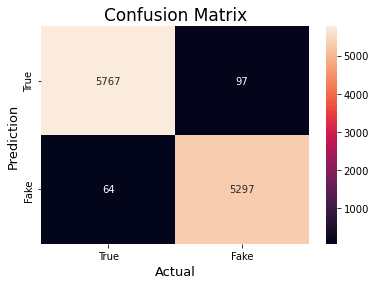

In [30]:
cm = confusion_matrix(y_test,pred_lr) 
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['True', 'Fake'],
            yticklabels=['True', 'Fake'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [31]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5864
           1       0.98      0.99      0.99      5361

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



#### Applying second model:DECISIONTREE CLASSIFIER

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)


DecisionTreeClassifier()

In [33]:
pred_dt=DT.predict(xv_test)

In [34]:
DT.score(xv_test,y_test)

0.9958129175946547

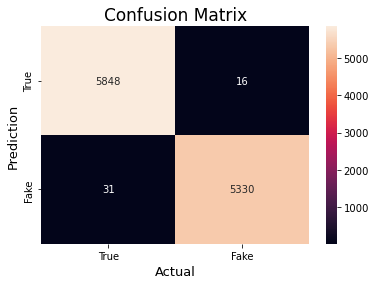

In [35]:
cm = confusion_matrix(y_test,pred_dt) 
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['True', 'Fake'],
            yticklabels=['True', 'Fake'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [36]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5864
           1       1.00      0.99      1.00      5361

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



# RESULT AND EXPLAINATION:
#### We have applied two models Logistic Regression and Decision Tree Classification,both models are predicting the results of news being fake or true with high accuracy.Decision Tree Classifier is more accurate and approprietly classifies the news as being fake or real news.
